In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import feature_importance_permutation

In [28]:
df = pd.read_csv('Class451_sampledata_new.csv')
df

,account_followers_count,account_friends_count,account_statuses_count,account_verified,account_history,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,...,tweet_id_str,tweet_full,DV_count_retweet,DV_count_like,DV_count_reply,DV_count_quote,DV_n_retweet,DV_n_like,DV_n_reply,DV_n_quote
0,12,201,2439,False,2394,0.144617,0.171626,0.113067,0.085847,0.129825,...,1273557998980542464,Covid-19: Here’s why Coronavirus disease affec...,0,0,0,0,Low,Low,Low,Low
1,297,122,2109,False,690,0.067579,0.064917,0.055364,0.109878,0.033034,...,1276078731086495744,St. John’s city council moves to defer 11 proj...,0,0,0,0,Low,Low,Low,Low
2,370,43,101637,False,3552,0.128580,0.088478,0.128872,0.120987,0.122520,...,1274370487402053632,Arteta has also struggled massively in making ...,0,0,0,0,Low,Low,Low,Low
3,265,406,1006,False,1879,0.110919,0.095154,0.115758,0.085983,0.076592,...,1277286192518758400,When Cyril Ramaphosa announced the lockdown in...,0,0,0,0,Low,Low,Low,Low
4,4014,779,13147,False,1116,0.109688,0.126783,0.089472,0.114775,0.086732,...,1273273462350581762,California's lockdown double standard called o...,0,0,0,0,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228533,124,354,1796,False,2465,0.206870,0.143743,0.094863,0.120812,0.104167,...,1275029528054845441,After 2 months of lockdown we're now allowed t...,0,0,0,0,Low,Low,Low,Low
228534,42,75,10043,False,1015,0.073505,0.078568,0.070903,0.068914,0.057314,...,1276507813234294785,New Report: 73 Percent of Meat Producers Score...,0,0,0,0,Low,Low,Low,Low
228535,12135,951,12834,True,2092,0.066803,0.057099,0.058319,0.057957,0.051910,...,1273675628953440258,Coronation Street to air new specials during l...,2,2,0,0,Low,Low,Low,Low
228536,11,40,476,False,52,0.109876,0.076964,0.082854,0.091620,0.052744,...,1272951581349199877,"Question, if Covid is so dangerous, deadly and...",0,0,0,0,Low,Low,Low,Low


In [29]:
label_dict3 = {'Low':0,
               'High':1}
df['DV_n_retweet'] = df['DV_n_retweet'].map(label_dict3)
df['DV_n_like'] = df['DV_n_like'].map(label_dict3)
df['DV_n_reply'] = df['DV_n_reply'].map(label_dict3)
df['DV_n_quote'] = df['DV_n_quote'].map(label_dict3)
df

,account_followers_count,account_friends_count,account_statuses_count,account_verified,account_history,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,...,tweet_id_str,tweet_full,DV_count_retweet,DV_count_like,DV_count_reply,DV_count_quote,DV_n_retweet,DV_n_like,DV_n_reply,DV_n_quote
0,12,201,2439,False,2394,0.144617,0.171626,0.113067,0.085847,0.129825,...,1273557998980542464,Covid-19: Here’s why Coronavirus disease affec...,0,0,0,0,0,0,0,0
1,297,122,2109,False,690,0.067579,0.064917,0.055364,0.109878,0.033034,...,1276078731086495744,St. John’s city council moves to defer 11 proj...,0,0,0,0,0,0,0,0
2,370,43,101637,False,3552,0.128580,0.088478,0.128872,0.120987,0.122520,...,1274370487402053632,Arteta has also struggled massively in making ...,0,0,0,0,0,0,0,0
3,265,406,1006,False,1879,0.110919,0.095154,0.115758,0.085983,0.076592,...,1277286192518758400,When Cyril Ramaphosa announced the lockdown in...,0,0,0,0,0,0,0,0
4,4014,779,13147,False,1116,0.109688,0.126783,0.089472,0.114775,0.086732,...,1273273462350581762,California's lockdown double standard called o...,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228533,124,354,1796,False,2465,0.206870,0.143743,0.094863,0.120812,0.104167,...,1275029528054845441,After 2 months of lockdown we're now allowed t...,0,0,0,0,0,0,0,0
228534,42,75,10043,False,1015,0.073505,0.078568,0.070903,0.068914,0.057314,...,1276507813234294785,New Report: 73 Percent of Meat Producers Score...,0,0,0,0,0,0,0,0
228535,12135,951,12834,True,2092,0.066803,0.057099,0.058319,0.057957,0.051910,...,1273675628953440258,Coronation Street to air new specials during l...,2,2,0,0,0,0,0,0
228536,11,40,476,False,52,0.109876,0.076964,0.082854,0.091620,0.052744,...,1272951581349199877,"Question, if Covid is so dangerous, deadly and...",0,0,0,0,0,0,0,0


In [30]:
df['account_verified'] = df['account_verified'].astype('|S')
label_dict2 = {b'False':0,
               b'True':1}
df['account_verified'] = df['account_verified'].map(label_dict2)
df['account_verified'] = df['account_verified'].fillna(0.0).apply(np.int64)
df.head()

,account_followers_count,account_friends_count,account_statuses_count,account_verified,account_history,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,...,tweet_id_str,tweet_full,DV_count_retweet,DV_count_like,DV_count_reply,DV_count_quote,DV_n_retweet,DV_n_like,DV_n_reply,DV_n_quote
0,12,201,2439,0,2394,0.144617,0.171626,0.113067,0.085847,0.129825,...,1273557998980542464,Covid-19: Here’s why Coronavirus disease affec...,0,0,0,0,0,0,0,0
1,297,122,2109,0,690,0.067579,0.064917,0.055364,0.109878,0.033034,...,1276078731086495744,St. John’s city council moves to defer 11 proj...,0,0,0,0,0,0,0,0
2,370,43,101637,0,3552,0.128580,0.088478,0.128872,0.120987,0.122520,...,1274370487402053632,Arteta has also struggled massively in making ...,0,0,0,0,0,0,0,0
3,265,406,1006,0,1879,0.110919,0.095154,0.115758,0.085983,0.076592,...,1277286192518758400,When Cyril Ramaphosa announced the lockdown in...,0,0,0,0,0,0,0,0
4,4014,779,13147,0,1116,0.109688,0.126783,0.089472,0.114775,0.086732,...,1273273462350581762,California's lockdown double standard called o...,0,0,0,0,0,0,0,0


In [31]:
df['account_history'] = pd.to_numeric(df['account_history'])

In [32]:
df['combination'] = df['DV_n_retweet'] + df['DV_n_like'] + df['DV_n_reply'] + df['DV_n_quote']
df

,account_followers_count,account_friends_count,account_statuses_count,account_verified,account_history,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,...,tweet_full,DV_count_retweet,DV_count_like,DV_count_reply,DV_count_quote,DV_n_retweet,DV_n_like,DV_n_reply,DV_n_quote,combination
0,12,201,2439,0,2394,0.144617,0.171626,0.113067,0.085847,0.129825,...,Covid-19: Here’s why Coronavirus disease affec...,0,0,0,0,0,0,0,0,0
1,297,122,2109,0,690,0.067579,0.064917,0.055364,0.109878,0.033034,...,St. John’s city council moves to defer 11 proj...,0,0,0,0,0,0,0,0,0
2,370,43,101637,0,3552,0.128580,0.088478,0.128872,0.120987,0.122520,...,Arteta has also struggled massively in making ...,0,0,0,0,0,0,0,0,0
3,265,406,1006,0,1879,0.110919,0.095154,0.115758,0.085983,0.076592,...,When Cyril Ramaphosa announced the lockdown in...,0,0,0,0,0,0,0,0,0
4,4014,779,13147,0,1116,0.109688,0.126783,0.089472,0.114775,0.086732,...,California's lockdown double standard called o...,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228533,124,354,1796,0,2465,0.206870,0.143743,0.094863,0.120812,0.104167,...,After 2 months of lockdown we're now allowed t...,0,0,0,0,0,0,0,0,0
228534,42,75,10043,0,1015,0.073505,0.078568,0.070903,0.068914,0.057314,...,New Report: 73 Percent of Meat Producers Score...,0,0,0,0,0,0,0,0,0
228535,12135,951,12834,1,2092,0.066803,0.057099,0.058319,0.057957,0.051910,...,Coronation Street to air new specials during l...,2,2,0,0,0,0,0,0,0
228536,11,40,476,0,52,0.109876,0.076964,0.082854,0.091620,0.052744,...,"Question, if Covid is so dangerous, deadly and...",0,0,0,0,0,0,0,0,0


In [33]:
for x in df.index:
  if df.loc[x, 'combination'] > 0:
    df.loc[x, 'combination'] = 1

df

,account_followers_count,account_friends_count,account_statuses_count,account_verified,account_history,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,...,tweet_full,DV_count_retweet,DV_count_like,DV_count_reply,DV_count_quote,DV_n_retweet,DV_n_like,DV_n_reply,DV_n_quote,combination
0,12,201,2439,0,2394,0.144617,0.171626,0.113067,0.085847,0.129825,...,Covid-19: Here’s why Coronavirus disease affec...,0,0,0,0,0,0,0,0,0
1,297,122,2109,0,690,0.067579,0.064917,0.055364,0.109878,0.033034,...,St. John’s city council moves to defer 11 proj...,0,0,0,0,0,0,0,0,0
2,370,43,101637,0,3552,0.128580,0.088478,0.128872,0.120987,0.122520,...,Arteta has also struggled massively in making ...,0,0,0,0,0,0,0,0,0
3,265,406,1006,0,1879,0.110919,0.095154,0.115758,0.085983,0.076592,...,When Cyril Ramaphosa announced the lockdown in...,0,0,0,0,0,0,0,0,0
4,4014,779,13147,0,1116,0.109688,0.126783,0.089472,0.114775,0.086732,...,California's lockdown double standard called o...,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228533,124,354,1796,0,2465,0.206870,0.143743,0.094863,0.120812,0.104167,...,After 2 months of lockdown we're now allowed t...,0,0,0,0,0,0,0,0,0
228534,42,75,10043,0,1015,0.073505,0.078568,0.070903,0.068914,0.057314,...,New Report: 73 Percent of Meat Producers Score...,0,0,0,0,0,0,0,0,0
228535,12135,951,12834,1,2092,0.066803,0.057099,0.058319,0.057957,0.051910,...,Coronation Street to air new specials during l...,2,2,0,0,0,0,0,0,0
228536,11,40,476,0,52,0.109876,0.076964,0.082854,0.091620,0.052744,...,"Question, if Covid is so dangerous, deadly and...",0,0,0,0,0,0,0,0,0


In [87]:
collections.Counter(df['combination'])

Counter({0: 210071, 1: 18467})

In [37]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-17].values
y = df['combination'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle= True,
                                                    stratify = y)

In [69]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (159976, 27)
y_train.shape: (159976,)
X_test.shape: (68562, 27)
y_test.shape: (68562,)


KNN = 3 without using smote

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

# print('Test set accuracy: %.2f%%' % accuracy)

print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 91.59%


In [105]:
from sklearn.metrics import confusion_matrix

confmat3 = confusion_matrix(y_test, knn_model.predict(X_test))
print(confmat3)

[[61358  1664]
 [ 4099  1441]]


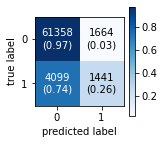

In [106]:
fig, ax = plot_confusion_matrix(conf_mat=confmat3,
                                figsize=(2,2),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig("KNN without SMOTE CM.png", dpi=200, bbox_inches='tight')
plt.show()

In [107]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=knn_model.predict(X_test)))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=knn_model.predict(X_test)))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=knn_model.predict(X_test)))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=knn_model.predict(X_test)))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=knn_model.predict(X_test)))

Accuracy: 0.916
Precision: 0.464
Recall: 0.260
F1: 0.333
MCC: 0.306


Random Foreest without using smote

In [81]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100,
                                random_state=1)
forest.fit(X_train, y_train)

print("Training accuracy: %0.4f" % forest.score(X_train, y_train))
print("Test accuracy: %0.4f" % forest.score(X_test, y_test))

Training accuracy: 0.9999
Test accuracy: 0.9292


In [82]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=forest.predict(X_test)))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=forest.predict(X_test)))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=forest.predict(X_test)))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=forest.predict(X_test)))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=forest.predict(X_test)))

Accuracy: 0.929
Precision: 0.694
Recall: 0.222
F1: 0.337
MCC: 0.367


In [85]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_test, forest.predict(X_test))
print(confmat)

[[62478   544]
 [ 4308  1232]]


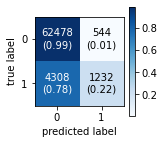

In [97]:
fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                figsize=(2,2),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig("RM without SMOTE CM.png", dpi=200, bbox_inches='tight')
plt.show()

SMOTE

In [56]:
from imblearn.over_sampling import SMOTE 
import collections, numpy

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
collections.Counter(y_sm)

Shape of X before SMOTE: (228538, 27)
Shape of X after SMOTE: (420142, 27)

Balance of positive and negative classes (%):


Counter({0: 210071, 1: 210071})

KNN = 3

In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn_model2 = KNeighborsClassifier(n_neighbors=3)
knn_model2.fit(X_sm, y_sm)

y_pred2 = knn_model2.predict(X_test)

num_correct_predictions = (y_pred2 == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

# print('Test set accuracy: %.2f%%' % accuracy)

print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 91.63%


In [116]:
from sklearn.metrics import confusion_matrix

confmat3 = confusion_matrix(y_test, knn_model2.predict(X_test))
print(confmat3)

[[57378  5644]
 [   94  5446]]


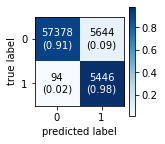

In [117]:
fig, ax = plot_confusion_matrix(conf_mat=confmat3,
                                figsize=(2,2),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig("KNN with SMOTE CM.png", dpi=200, bbox_inches='tight')
plt.show()

In [110]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=knn_model2.predict(X_test)))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=knn_model2.predict(X_test)))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=knn_model2.predict(X_test)))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=knn_model2.predict(X_test)))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=knn_model2.predict(X_test)))

Accuracy: 0.916
Precision: 0.491
Recall: 0.983
F1: 0.655
MCC: 0.661


Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

forest2 = RandomForestClassifier(n_estimators = 100,
                                random_state=1)
forest2.fit(X_sm, y_sm)

print("Training accuracy: %0.4f" % forest2.score(X_sm, y_sm))
print("Test accuracy: %0.4f" % forest2.score(X_test, y_test))

Training accuracy: 1.0000
Test accuracy: 0.9999


In [101]:
from sklearn.metrics import confusion_matrix

confmat2 = confusion_matrix(y_test, forest2.predict(X_test))
print(confmat)

[[62478   544]
 [ 4308  1232]]


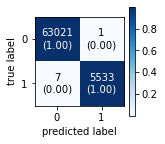

In [102]:
fig, ax = plot_confusion_matrix(conf_mat=confmat2,
                                figsize=(2,2),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig("RM with SMOTE CM.png", dpi=200, bbox_inches='tight')
plt.show()


In [80]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=forest.predict(X_test)))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=forest.predict(X_test)))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=forest.predict(X_test)))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=forest.predict(X_test)))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=forest.predict(X_test)))


Accuracy: 1.000
Precision: 1.000
Recall: 0.999
F1: 0.999
MCC: 0.999


Importance Score

[0.16974998 0.03413016 0.03112342 0.07096189 0.02731512 0.01648772
 0.01640171 0.01643825 0.01658563 0.01656299 0.04021766 0.01731472
 0.04415636 0.01183692 0.04495801 0.03360778 0.03929863 0.01172867
 0.01679726 0.02699179 0.03478066 0.09598239 0.03859031 0.04125206
 0.00513176 0.00234345 0.07925473]


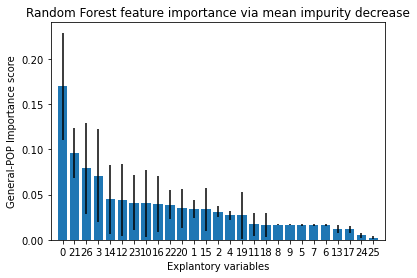

In [112]:
importance_vals = forest2.feature_importances_
print(importance_vals)

std = np.std([tree.feature_importances_ for tree in forest2.estimators_],
             axis=0)
indices = np.argsort(importance_vals)[::-1]

x_data = X

# Plot the feature importances of the forest
plt.figure()
plt.title("Random Forest feature importance via mean impurity decrease")
plt.bar(range(x_data.shape[1]), importance_vals[indices],
        yerr=std[indices], align="center")
plt.xticks(range(x_data.shape[1]), indices)
plt.xlim([-1, x_data.shape[1]])
plt.ylabel("General-POP Importance score")
plt.xlabel("Explantory variables")
plt.savefig("Random Forest feature importance via mean impurity decrease.png", dpi = 200)
plt.show()

Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=8,
    random_state=1)

boost.fit(X_sm, y_sm)
    
    
print("Training Accuracy: %0.4f" % boost.score(X_train, y_train))
print("Test Accuracy: %0.4f" % boost.score(X_test, y_test))

Training Accuracy: 0.9311
Test Accuracy: 0.9300


Cat Boost

In [77]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0)

params = {'max_depth': [5, 8], 'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.05]}

grid = GridSearchCV(estimator = catboost,
                   param_grid = params,
                   cv = 5,
                   n_jobs = -1,
                   verbose = 2)

grid.fit(X_sm, y_sm)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002115434DA90>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [5, 8],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [78]:
print(f"Train set accuracy: {grid.best_estimator_.score(X_train, y_train)*100:0.3f}%")
print(f"Test set accuracy: {grid.best_estimator_.score(X_test, y_test)*100:0.3f}%")

Train set accuracy: 92.508%
Test set accuracy: 92.408%


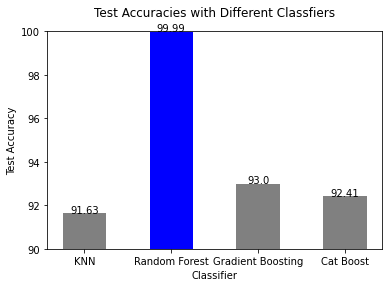

In [2]:
import matplotlib.pyplot as plt
import numpy as np

xplot = np.array(["KNN", "Random Forest", "Gradient Boosting", "Cat Boost"])
yplot = np.array([91.63, 99.99, 93.00, 92.41])


clrs = ['grey' if (a < max(yplot)) else 'blue' for a in yplot ]
plt.bar(xplot, yplot, width = 0.5, color=clrs)
plt.ylim(90, 100)
plt.title("Test Accuracies with Different Classfiers", pad = 15)
plt.ylabel("Test Accuracy")
plt.xlabel("Classifier")
for index, value in enumerate(yplot):
    plt.text(index, value, str(value), ha='center')
plt.savefig("Comparation.png", dpi = 200)
plt.show()

In [83]:
import numpy as np
from mlxtend.evaluate import mcnemar_table


tb2= mcnemar_table(y_target=y_test, 
                   y_model1=grid.predict(X_test), 
                   y_model2=forest.predict(X_test))


from mlxtend.evaluate import mcnemar

chi22, p2 = mcnemar(ary=tb2, corrected = True, exact = False)
print('chi-squared:', chi22)
print('p-value:', p2)
tb2

chi-squared: 56.39690487027765
p-value: 5.922352115255203e-14


array([[62435,   922],
       [ 1275,  3930]])

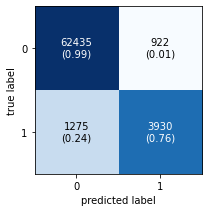

In [84]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=tb2,
                                show_absolute=True,
                                show_normed=True,
                                figsize=(3, 3.3))
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
df.iloc[:,21]